# ScoreSight - Top Goal Scorer Prediction (EDA & Preprocessing)
Author: Rishi Khandekar  
Internship: Infosys  
Goal: Predict total goals scored by a player in a season (Regression)

In [6]:
!pip install seaborn


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Set visualization style
sns.set(style="whitegrid", palette="pastel", font_scale=1.1)

In [8]:
# Load Dataset
df = pd.read_csv("topgoals.csv")
print("Shape of dataset:", df.shape)
display(df.head())

Shape of dataset: (324, 20)


,Season,Rank,Player,Club,Goals,Position,Age,Appearances,Minutes_Played,Goals_prev_season,Assists,Penalty_Goals,Non-Penalty_Goals,Goals_per_90,Big_6_Club_Feature,Club_League_Rank,Club_Total_Goals,League_Goals_per_Match,Games_in_Season,Goals_last_3_seasons_avg
0,2023-24,1,Erling Haaland,Manchester City,27,Forward,23,31,2682,36,6,1.0,26,0.87,1,1,96,2.83,38.0,31.50
1,2023-24,2,Cole Palmer,Chelsea,22,Attacking Midfielder,22,33,2674,3,11,9.0,13,0.74,1,6,77,2.83,38.0,13.33
2,2023-24,3,Alexander Isak,Newcastle United,21,Forward,24,30,2403,10,2,5.0,16,0.79,0,7,85,2.83,38.0,13.00
3,2023-24,4,Ollie Watkins,Aston Villa,19,Forward,28,37,3302,15,13,0.0,19,0.52,0,4,76,2.83,38.0,14.67
4,2023-24,4,Dominic Solanke,AFC Bournemouth,19,Forward,26,38,3355,6,3,1.0,18,0.51,0,12,54,2.83,38.0,10.00


In [9]:
# Data Cleaning - Drop leakage/unnecessary columns
drop_cols = [
    "Rank", "Player", "Club", "Season", "Games_in_Season",
    "Club_League_Rank", "Club_Total_Goals", "Penalty_Goals", "Non-Penalty_Goals"
]
df = df.drop(columns=[c for c in drop_cols if c in df.columns])

print("Remaining Columns:", df.columns.tolist())
print("\nMissing values per column:")
print(df.isnull().sum())

Remaining Columns: ['Goals', 'Position', 'Age', 'Appearances', 'Minutes_Played', 'Goals_prev_season', 'Assists', 'Goals_per_90', 'Big_6_Club_Feature', 'League_Goals_per_Match', 'Goals_last_3_seasons_avg']

Missing values per column:
Goals                       0
Position                    0
Age                         0
Appearances                 0
Minutes_Played              0
Goals_prev_season           0
Assists                     0
Goals_per_90                3
Big_6_Club_Feature          0
League_Goals_per_Match      0
Goals_last_3_seasons_avg    0
dtype: int64


In [10]:
# Handle missing values (fixed - avoid inplace warnings)
for col in df.columns:
    if df[col].dtype != 'object':
        df[col] = df[col].fillna(df[col].median())
    else:
        df[col] = df[col].fillna(df[col].mode()[0])

print("Missing values after imputation:")
print(df.isnull().sum())

Missing values after imputation:
Goals                       0
Position                    0
Age                         0
Appearances                 0
Minutes_Played              0
Goals_prev_season           0
Assists                     0
Goals_per_90                0
Big_6_Club_Feature          0
League_Goals_per_Match      0
Goals_last_3_seasons_avg    0
dtype: int64


In [11]:
# Target & Feature Split
target = "Goals"
X = df.drop(columns=[target])
y = df[target]

print("Target variable (Goals) stats:")
print(y.describe())

Target variable (Goals) stats:
count    324.000000
mean      17.688272
std        4.873481
min        9.000000
25%       14.000000
50%       17.000000
75%       20.000000
max       36.000000
Name: Goals, dtype: float64


In [12]:
# One-Hot Encode categorical column 'Position'
X_encoded = pd.get_dummies(X, columns=["Position"], drop_first=True)
print("Shape after encoding:", X_encoded.shape)

Shape after encoding: (324, 12)


In [13]:
# Outlier Detection (IQR Method)
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

numeric_cols = X_encoded.select_dtypes(include=np.number).columns
for col in list(numeric_cols)[:5]:
    print(f"{col}: {len(detect_outliers_iqr(X_encoded, col))} outliers")

Age: 1 outliers
Appearances: 9 outliers
Minutes_Played: 7 outliers
Goals_prev_season: 42 outliers
Assists: 39 outliers


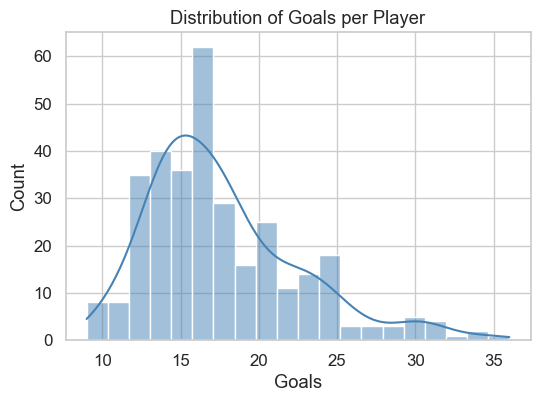

In [14]:
# EDA - Distribution of Goals
plt.figure(figsize=(6,4))
sns.histplot(y, bins=20, kde=True, color="steelblue")
plt.title("Distribution of Goals per Player")
plt.show()

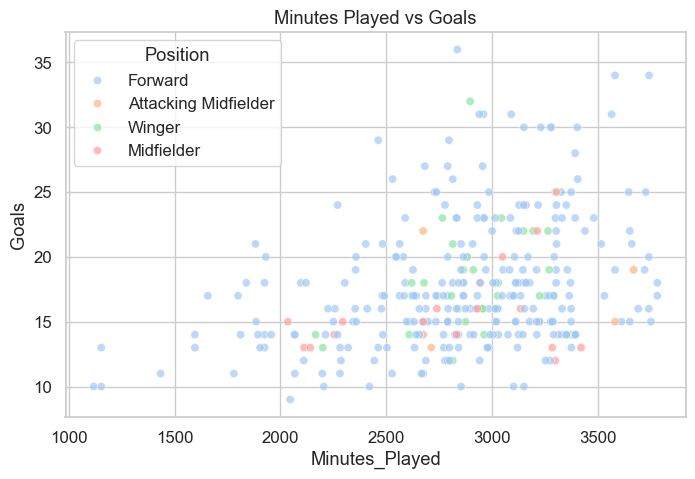

In [15]:
# EDA - Minutes Played vs Goals
plt.figure(figsize=(8,5))
sns.scatterplot(x=df["Minutes_Played"], y=y, hue=df["Position"], alpha=0.7)
plt.title("Minutes Played vs Goals")
plt.show()

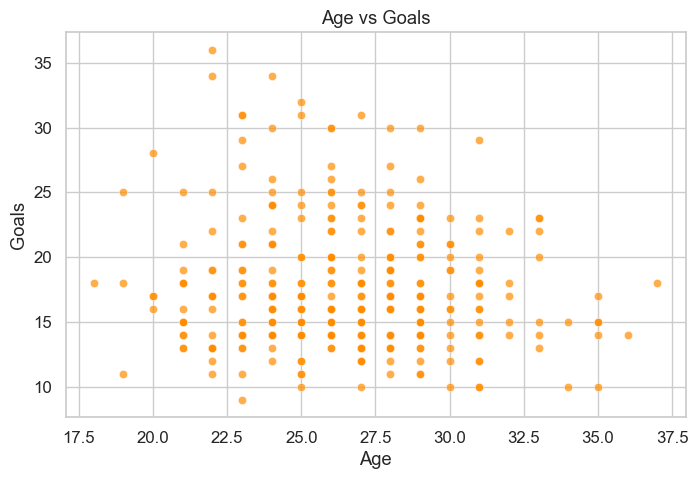

In [16]:
# EDA - Age vs Goals
plt.figure(figsize=(8,5))
sns.scatterplot(x=df["Age"], y=y, alpha=0.7, color="darkorange")
plt.title("Age vs Goals")
plt.show()

C:\Users\rishi\AppData\Local\Temp\ipykernel_900\1974767068.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["Position"], y=y, palette="Set2")


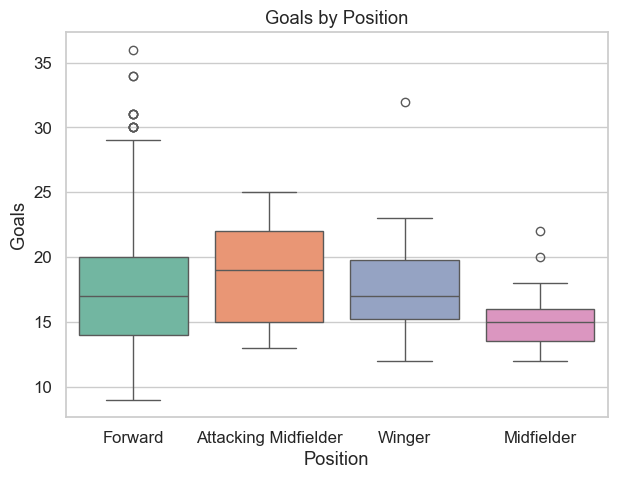

In [17]:
# EDA - Position vs Goals
plt.figure(figsize=(7,5))
sns.boxplot(x=df["Position"], y=y, palette="Set2")
plt.title("Goals by Position")
plt.show()

C:\Users\rishi\AppData\Local\Temp\ipykernel_900\3943751585.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["Big_6_Club_Feature"], y=y, palette="muted")


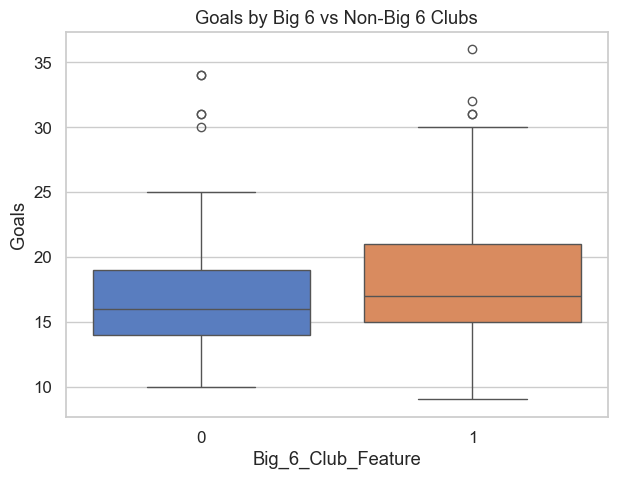

In [18]:
# EDA - Big 6 Club vs Goals
plt.figure(figsize=(7,5))
sns.boxplot(x=df["Big_6_Club_Feature"], y=y, palette="muted")
plt.title("Goals by Big 6 vs Non-Big 6 Clubs")
plt.show()

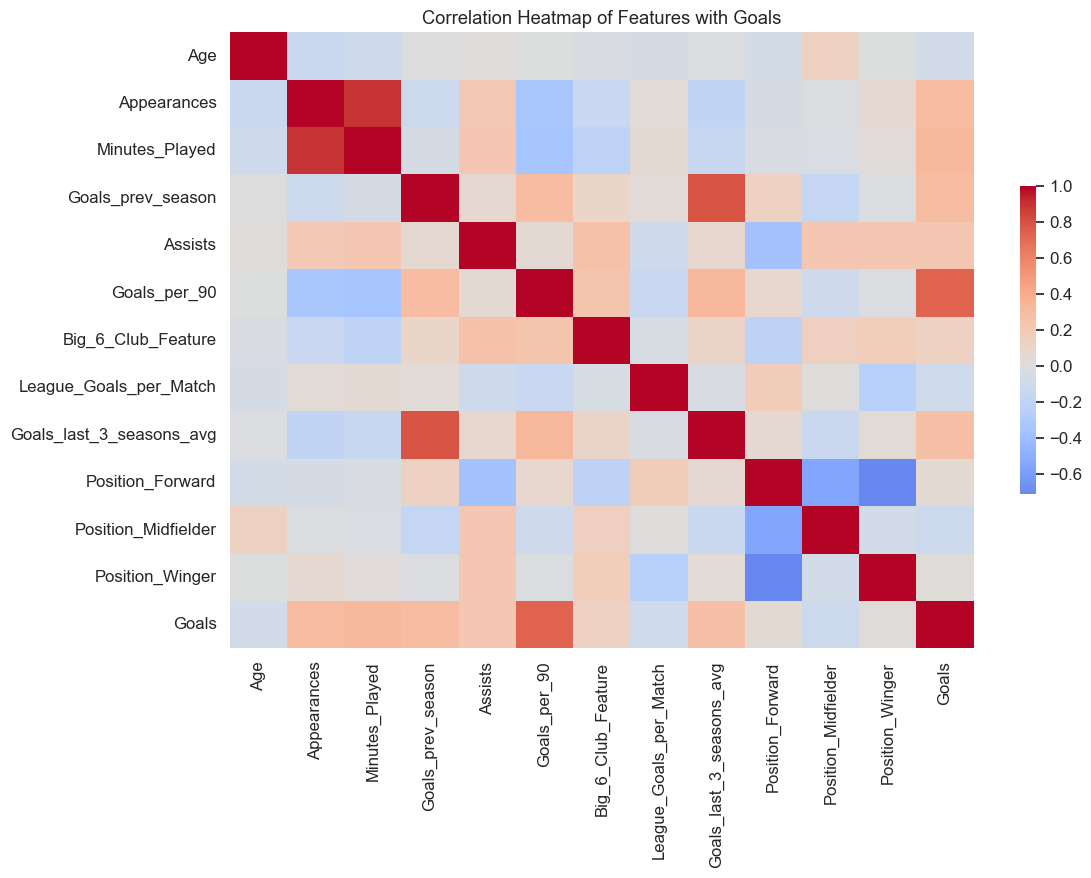

In [19]:
# Correlation Heatmap
plt.figure(figsize=(12,8))
corr = X_encoded.join(y).corr()
sns.heatmap(corr, cmap="coolwarm", center=0, cbar_kws={'shrink':0.5})
plt.title("Correlation Heatmap of Features with Goals")
plt.show()

In [20]:
# Train-Test Split (Setup)
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (259, 12)
Test shape: (65, 12)


In [21]:
# Evaluation Template (Dummy Baseline)
# Baseline: predict mean goals for all players
y_pred_dummy = np.full_like(y_test, y.mean(), dtype=float)

mae = mean_absolute_error(y_test, y_pred_dummy)
mse = mean_squared_error(y_test, y_pred_dummy)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_dummy)

print("Baseline Evaluation Metrics:")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.2f}")

Baseline Evaluation Metrics:
MAE: 3.40
MSE: 19.77
RMSE: 4.45
R²: -0.01
